<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

# **Machine Learning with XGboost**

Welcome to this hands-on training where we will learn how to use XGBoost to create powerful prediction models using gradient boosting. Using Jupyter Notebooks you'll learn how to efficiently create, evaluate, and tune XGBoost models. This session will run for three hours, allowing you time to really immerse yourself in the subject, and includes short breaks and opportunities to ask the expert questions throughout the training. 

You will learn how to:

- How to instantiate and customize XGBoost models
- How to use XGBoost's DMatrix to optimize performance
- How to evaluate models in XGBoost using the right metrics
- How to tune parameters in XGBoost to achieve the best results
- How to visualize trees in XGBoost to analyze feature importance


## **The Dataset**

The dataset to be used in this webinar is a CSV file named `hotel_bookings_clean.csv`, which contains data on hotel bookings. 

### Acknowledgements
The dataset was downloaded on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand/). The data is originally from an article called [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) by Nuno Antonio, Ana de Almeida, and Luis Nunes. It was then cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md). For the purposes of this live training, it was further pre-processed to have cleaner ready-to-use features (e.g., dropping of irrelevant columns, one-hot-encoding). The dataset has the following [license](https://creativecommons.org/licenses/by/4.0/).

### Data Dictionary

It contains the **53 columns**:

_For binary variables: `1` = true and `0` = false._

- `is_cancelled`: binary variable indicating whether a booking was canceled
- `lead time`: Number of days bettween booking data and arrival date
- `arrival_date_week_number`, `arrival_date_day_of_month`, `arrival_date_month`: Week number, day date, and month number of arrival date. 
- `stays_in_weekend_nights`, `stays_in_week_nights`: Number of weekend nights (Saturday and Sunday) and week nights (Monday to Friday) the guest booked
- `adults`,`children`,`babies`: Number of adults, children, babies booked for the stay
- `is_repeated_guest`: binary variable indicating whether the customer was a repeat guest 
- `previous_cancellations`: Number of prior bookings that were cancelled by the customer
- `previous_bookings_not_canceled`: Number of prior bookings that were not cancelled by the customer
- `required_car_parking_spaces`: Number of parking spaces needed by the customer
- `total_of_special_requests`: Number of special requests made by the customer
- `avg_daily_rate`: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `booked_by_company`: binary variable indicating whether the booking was booked by a company               
- `booked_by_agent`: binary variable indicating whether the booking was booked by an agent 
- `hotel_city Hotel`: binary variable indicating whether the booked hotel is a "City Hotel"
- `hotel_Resort Hotel`: binary variable indicating whether the booked hotel is a "Resort Hotel"
- `meal_BB`: binary variable indicating whether a bed & breakfast meal was booked 
- `meal_HB`: binary variable indicating whether a half board meal was booked
- `meal_FB`: binary variable indicating whether a full board meal was booked 
- `meal_No meal`:binary variable indicating whether there was no meal package booked 
- `market_segment_Aviation`, `market_segment_Complementary`, `market_segment_Corporate`, `market_segment_Direct`, `market_segment_Groups`, `market_segment_Offline TA/TO`, `market_segment_Online TA`, `market_segment_Undefined`: Indicates market segment designation with a value of `1`. "TA"= travel agent, "TO"= tour operators.
- `distribution_channel_Corporate`, `distribution_channel_Direct`, `distribution_channel_GDS`, `distribution_channel_TA/TO`, `distribution_channel_Undefined`: indicates booking distribution channel with a value of `1`. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System.
- `reserved_room_type_A`,`reserved_room_type_B`, `reserved_room_type_C`,`reserved_room_type_D`, `reserved_room_type_E`, `reserved_room_type_F`, `reserved_room_type_G`, `reserved_room_type_H`, `reserved_room_type_L`: indicates code of room type reserved with a value of `1`. Code is presented instead of designation for anonymity reasons
- `deposit_type_No Deposit`: binary variable indicating whether a deposit was made
- `deposit_type_Non Refund`: binary variable indicating whether a deposit was made in the value of the total stay cost
- `deposit_type_Refundable`: binary variable indicating whether a deposit was made with a value under the total stay cost 
- `customer_type_Contract`: binary variable indicating whether the booking has an allotment or other type of contract associated to it 
- `customer_type_Group`: binary variable indicating whether the booking is associated to a group 
- `customer_type_Transient`: binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking
- `customer_type_Transient-Party`: binary variable indicating whether the booking is transient, but is associated to at least other transient booking

## **1 Getting started**

Let's get to know our columns and split our data into features and labels!

In [1]:
# Import libraries
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np

In [2]:
# Read in the dataset
bookings = pd.read_csv('../data/hotel_bookings_clean.csv')

# What are our columns?
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [3]:
# Take a closer look at distributions
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


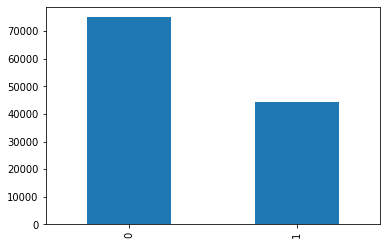

In [4]:
# How many bookings are cancelled in this dataset?
bookings['is_canceled'].value_counts().plot(kind='bar')

In [5]:
# Ok, percentage?
# TODO

In [6]:
# Let's get a sense of what may be our most powerful features
correlation = bookings.corr()['is_canceled'].sort_values(ascending=False)
print(correlation)

is_canceled                       1.000000
deposit_type_Non Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA/TO        0.176005
hotel_City Hotel                  0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

In [7]:
# Split our label so we can get to building models!
# The first column is our label `is_cancelled`, the rest are features
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

## 2 Your First XGBoost Classifier 

Let's use `XGBoost`'s `scikit-learn` API for XGBoost classification and get a baseline accuracy

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=6)

# Instantiate a XGBClassifier
## Let's do default values for parameters
### max depth: Maximum tree depth for base learners.
### n_estimators: Number of gradient boosted trees. Equivalent to number of boosting rounds.

xg_cl = xgb.XGBClassifier(max_depth=6, n_estimators=10)

# Fit it to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set
preds = xg_cl.predict(X_test)

# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.815938


### Visualizing your tree

ImportError: You must install graphviz to plot tree

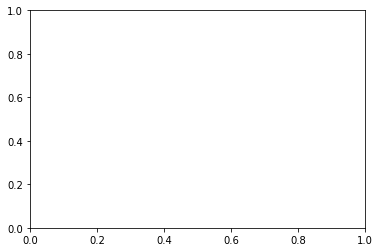

In [14]:
xgb.plot_tree(xg_cl)
plt.show()

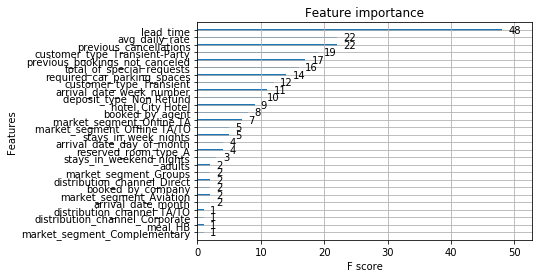

In [13]:
xgb.plot_importance(xg_cl)

# 3 Cross Validation in XGBoost

Cross validation is best practice, let's see how to use it in XGBoost

## First DMartix
Before we can use cross validation in `XGBoost`, we need to convert our dataframe into a `DMatrix`.

In [ ]:
bookings_dmatrix = xgb.DMatrix(data=X,label=y)

## Cross validation with xgb.cv

In [ ]:
# define booster parameters using a dictionary
## for now let's just define our objective and the max_depth which is 6 as default
params = {"objective":"binary:logistic", 'max_depth': 6}

# 3 folds and 10 boosting rounds is the default
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=10,seed=123)

# How are results stored?
xgb_cv

## Results in XGBoost

`error` as defined by [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters):
> Binary classification error rate. It is calculated as `#(wrong cases)/#(all cases)`. For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.

In [ ]:
# Get the result from last boosting round
results = xgb_cv.tail(1)

In [ ]:
print(results)

In [ ]:
print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

That isn't much different from our baseline of 0.815938 from earlier. Let's tune our parameters a bit more.

## More trees with early stopping
Let's add more trees (40 instead of 10), but make sure to add **early stopping** so that it doesn't run for too long

TODO: blurb about early stopping

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 6}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=40,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

Some improvement, but there's more we can do.

# 4 Digging into Parameters

Point of this section is to change a several parameters and realize it's too hard to manually try different ones and there are many combinations. For each parameter, I will explain what it does (TODO).

TODO: Make blurbs from 
https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

## Max depth
directly control model complexity.

Change max depth from 6 to 10. Let's lower num_boost_round since things will take longer with bigger tree depth.

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=30,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## colsample_bytree
add randomness to make training robust to noise. default is 1.

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10, 'colsample_bytree': 0.5}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=30,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## subsample
Default is 1

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10, 'colsample_bytree': 0.5, 'subsample':.75}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=30,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## min_child_weight
directly control model complexity. Default is 1

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10, 'colsample_bytree': 0.5, 'min_child_weight':2}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=30,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## gamma
directly control model complexity. Default is 0

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10, 'colsample_bytree': 0.5, 'gamma':.25}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=30,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## alpha
Default is 0

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10, 'colsample_bytree': 0.5, 'gamma':.25, 'alpha':0.1}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=30,early_stopping_rounds=5, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## num_boost_round and early stopping rounds
This also affects our results, but takes longer to run

In [ ]:
params = {"objective":"binary:logistic", 'max_depth': 10, 'colsample_bytree': 0.5, 'gamma':.25, 'alpha':0.1}

xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10, seed=123)

print(((1-xgb_cv["test-error-mean"]).iloc[-1]))

## Other Parameters

(while the above runs, I will talk about this section)

TODO: list other parameters that can be tune so that people know they exist.
take from: https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

take home point: there are a lot of parameters and we should not manually tune to pick the best one.

Segue into next section.


# 5 Hyperparameter Tuning

## Grid Search

XGBoost doesn't have a gridsearch function, so we need to use `scikit-learn`'s [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

This means we'll have to use `XGBClassifier()` because it's `scikit-learn` compatible.

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'colsample_bytree': [0.5, 0.75],
    'max_depth': [5,10],
    'n_estimators':[20,35] # remember n_estimator is the same as num_boosting_round

}

xg_cl = xgb.XGBClassifier()


# this will take a 1.5m to run (i will talk about the output or answer questions during that time)
# Perform grid search: 
xgb_grid = GridSearchCV(estimator=xg_cl, param_grid=xgb_param_grid, scoring='accuracy', cv=3, verbose=2)
xgb_grid.fit(X, y)

### Intepreting grid search results

In [ ]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_grid.best_params_)
print("Best accuracy found: ", xgb_grid.best_score_)

## Random Search

Because we're tight on time, let's try our luck with random search

Again, we need to use `scikit-learn`'s [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# now we need ranges
rs_param_grid = {
    'n_estimators': [20,50],
    'max_depth': [2, 12],
    'colsample_bytree': [0, 0.75],
    'gamma' : [0,.5]
}

xg_cl = xgb.XGBClassifier()


# this will take a 1.5m to run (i will talk about the output or answer questions during that time)
# Perform grid search: 
xgb_rs = RandomizedSearchCV(estimator=xg_cl,param_distributions=rs_param_grid, scoring='accuracy', cv=3, verbose=1)
xgb_rs.fit(X, y)


In [ ]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

## Take home

How high can you get the accuracy?